In [1]:
import requests
import sqlite3
import pandas as pd
from time import sleep

In [2]:
cities_df = pd.read_csv("cities_list.csv")
cities = cities_df["City"].tolist()

In [3]:
api_key = "854bfd100cd66f846501327373fc6a02"

For getting API key register using the link below and read documentation
https://openweathermap.org/current

In [2]:
conn = sqlite3.connect("weather_data.db")
cursor = conn.cursor()

In [5]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS weather (
    id INTEGER PRIMARY KEY,
    city TEXT,
    country TEXT,
    lon REAL,
    lat REAL,
    temp REAL,
    feels_like REAL,
    temp_min REAL,
    temp_max REAL,
    pressure INTEGER,
    humidity INTEGER,
    wind_speed REAL,
    wind_deg INTEGER,
    cloudiness INTEGER,
    description TEXT,
    datetime INTEGER
)
""")
conn.commit()

In [6]:
for city in cities:
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric&lang=en"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            cursor.execute("""
                INSERT INTO weather (city, country, lon, lat, temp, feels_like, temp_min, temp_max,
                pressure, humidity, wind_speed, wind_deg, cloudiness, description, datetime)
                VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """, (
                data["name"],
                data["sys"]["country"],
                data["coord"]["lon"],
                data["coord"]["lat"],
                data["main"]["temp"],
                data["main"]["feels_like"],
                data["main"]["temp_min"],
                data["main"]["temp_max"],
                data["main"]["pressure"],
                data["main"]["humidity"],
                data["wind"]["speed"],
                data["wind"]["deg"],
                data["clouds"]["all"],
                data["weather"][0]["description"],
                data["dt"]
            ))
            conn.commit()
        else:
            print(f"Failed to get data for {city}")
        sleep(1)
    except Exception as e:
        print(f"Error fetching data for {city}: {e}")


Failed to get data for Chornomorsk


In [3]:
query = "SELECT * FROM weather"
weather_data = pd.read_sql_query(query, conn)

In [9]:
weather_data.to_csv('weather.csv')

In [10]:
conn.close()

In [7]:
import matplotlib.pyplot as plt
import random

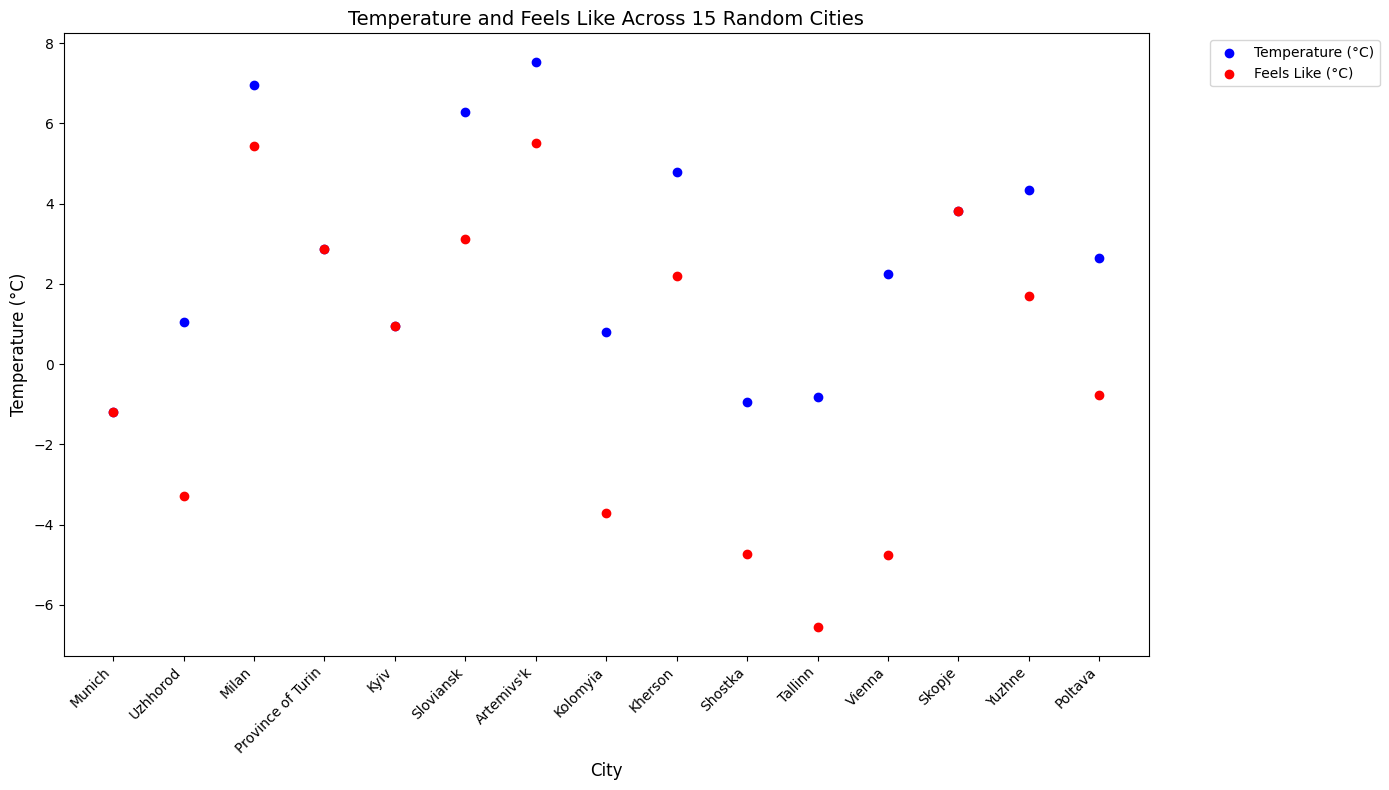

In [8]:
if not weather_data.empty:
    sampled_data = weather_data.sample(n=15, random_state=42)

    plt.figure(figsize=(14, 8))

    plt.scatter(sampled_data['city'], sampled_data['temp'], label='Temperature (°C)', color='blue')
    plt.scatter(sampled_data['city'], sampled_data['feels_like'], label='Feels Like (°C)', color='red')

    plt.xlabel('City', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.title('Temperature and Feels Like Across 15 Random Cities', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
    plt.tight_layout()

    plt.show()
else:
    print("Дані для візуалізації відсутні.")